In [1]:
import sklearn as s
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
y_train[0]

4

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1=model.layers[1]

In [13]:
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02606741, -0.01434201, -0.0027919 , ..., -0.00853626,
        -0.02000209, -0.0201534 ],
       [ 0.0149517 , -0.04920986,  0.04097205, ...,  0.07281232,
        -0.07435453,  0.06844285],
       [ 0.04069353, -0.03718376, -0.01652648, ...,  0.04324444,
         0.06884713, -0.04487143],
       ...,
       [ 0.02327611, -0.01352863, -0.02969991, ..., -0.01396338,
        -0.06431299,  0.00844902],
       [-0.02061901,  0.00581837, -0.03665047, ...,  0.00829571,
         0.04749186,  0.00092623],
       [-0.02309696, -0.04106113, -0.02985428, ...,  0.04175003,
         0.01678803, -0.0468138 ]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7283 - accuracy: 0.7640 - val_loss: 0.5091 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4920 - accuracy: 0.8295 - val_loss: 0.4606 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.8451 - val_loss: 0.4660 - val_accuracy: 0.8390
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4192 - accuracy: 0.8538 - val_loss: 0.3957 - val_accuracy: 0.8710
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3982 - accuracy: 0.8603 - val_loss: 0.3858 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8670 - val_loss: 0.3821 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3683 - accuracy: 0.8699 - val_loss: 0.3648 - val_accuracy:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

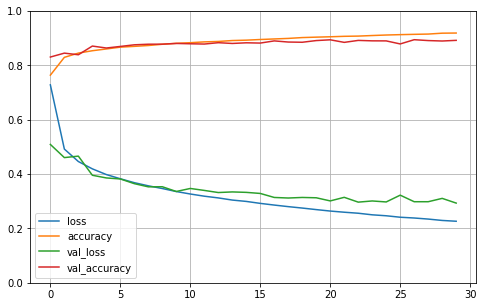

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 48.8809 - accuracy: 0.8650


[48.88090515136719, 0.8650000095367432]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [31]:
import numpy as np
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

C:\Users\genie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [34]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8350 - val_loss: 2.8875
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8211 - val_loss: 0.4720
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4610 - val_loss: 0.4159
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4281 - val_loss: 0.3954
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4521 - val_loss: 0.3977
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4064 - val_loss: 0.3812
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3974 - val_loss: 0.3866
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4002 - val_loss: 0.3945
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3867 - val_loss: 0.3708
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3843 - val_loss: 0.3595

In [36]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [37]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A,input_B], outputs=[output])

In [38]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B),y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


C:\Users\genie\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 2ms/step - loss: 2.0061 - val_loss: 0.9773
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8093 - val_loss: 0.6984
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6800 - val_loss: 0.6477
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6375 - val_loss: 0.6099
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6116 - val_loss: 0.5932
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5926 - val_loss: 0.5698
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5764 - val_loss: 0.5512
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5629 - val_loss: 0.5415
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5505 - val_loss: 0.5412
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5398 - val_loss: 0.5248
Epoch 11/2

In [39]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [40]:
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8214 - main_output_loss: 0.7317 - aux_output_loss: 1.6285 - val_loss: 1.7399 - val_main_output_loss: 1.8149 - val_aux_output_loss: 1.0653
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6404 - main_output_loss: 0.6003 - aux_output_loss: 1.0016 - val_loss: 0.4844 - val_main_output_loss: 0.4417 - val_aux_output_loss: 0.8689
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5030 - main_output_loss: 0.4658 - aux_output_loss: 0.8377 - val_loss: 0.4543 - val_main_output_loss: 0.4227 - val_aux_output_loss: 0.7391
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4702 - main_output_loss: 0.4412 - aux_output_loss: 0.7314 - val_loss: 0.4457 - val_main_output_loss: 0.4208 - val_aux_output_loss: 0.6696
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4485 - main_output_loss: 0.4239 - aux_output_loss: 0.6704 - val_loss

In [41]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3799 - main_output_loss: 0.3665 - aux_output_loss: 0.5006


In [42]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [43]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1) 
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs 
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat) 
        aux_output = self.aux_output(hidden2)

        return main_output, aux_output 

model = WideAndDeepModel()

In [44]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,  y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
model.save("my_keras_model.h5")

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7832 - val_loss: 0.6465
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8112 - val_loss: 0.5506
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5001 - val_loss: 0.5077
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4535 - val_loss: 0.4906
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4467 - val_loss: 0.4845
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4330 - val_loss: 0.4689
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4218 - val_loss: 0.4606
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4184 - val_loss: 0.4542
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4107 - val_loss: 0.4479
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4100 - val_loss: 0.4445

In [45]:
my_model = keras.models.load_model("my_keras_model.h5")

In [46]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3713
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3793
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3750
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3763
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3777
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3636
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3637
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3602
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3636
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3561


In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3528 - val_loss: 0.3876
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3450 - val_loss: 0.3851
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3415 - val_loss: 0.4615
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3501 - val_loss: 0.6503
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3422 - val_loss: 0.3867
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3380 - val_loss: 0.3831
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3408 - val_loss: 0.3795
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3411 - val_loss: 0.3842
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3380 - val_loss: 0.3745
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3506 - val_loss: 0.3853

In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3550 - val_loss: 0.3771
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.3751
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3371 - val_loss: 0.3731
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3309 - val_loss: 0.3723
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3298 - val_loss: 0.3733
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3330 - val_loss: 0.3727
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3343 - val_loss: 0.3701
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3279 - val_loss: 0.3694
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3274 - val_loss: 0.3679
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3265 - val_lo

In [50]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [51]:
tensorboard_cb = keras. callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3000 - val_loss: 0.3461
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3003 - val_loss: 0.3368
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3015 - val_loss: 0.3415
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3017 - val_loss: 0.3388
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2993 - val_loss: 0.3363
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3000 - val_loss: 0.3368
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3000 - val_loss: 0.3322
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2992 - val_loss: 0.3410
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3042 - val_loss: 0.3406
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2999 - val_loss: 0.3535

In [52]:
load_ext tensorboard

In [53]:
tensorboard --logdir=./my_logs --port=6006

In [54]:
import numpy as np

test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    data = (np.random.rand(100) + 2) * step / 100
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    images = np.random.rand(2, 32, 32, 3)
    tf.summary.image("my_images", images * step / 1000, step=step)
    texts = ["The step is " + str(step), "Its square Is " + str(step**2)]
    tf.summary.text("my_text", texts, step=step)
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
    audio = tf.reshape(tf.cast (sine_wave, tf.float32), [1,-1,1]) 
tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [55]:
tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 17608), started 0:00:07 ago. (Use '!kill 17608' to kill it.)

In [56]:
import tensorflow as tf
from tensorflow import keras

import sklearn
import numpy as np
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

In [57]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [58]:
NO_BN_model = keras.models.Sequential()
NO_BN_model.add(keras.layers.Flatten(input_shape=[28, 28]))
NO_BN_model.add(keras.layers.Dense(300, activation="relu"))
NO_BN_model.add(keras.layers.Dense(100, activation="relu"))
NO_BN_model.add(keras.layers.Dense(10, activation="softmax"))

In [59]:
BN_model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Dense(300, activation="relu"),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Dense(100, activation="relu"),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Dense(10, activation="softmax")])

In [60]:
bn1 = BN_model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [61]:
NO_BN_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=["accuracy"])
history = NO_BN_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


C:\Users\genie\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1719/1719 [==============================] - 4s 2ms/step - loss: 1.4650 - accuracy: 0.5863 - val_loss: 0.9974 - val_accuracy: 0.6936
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8759 - accuracy: 0.7195 - val_loss: 0.7735 - val_accuracy: 0.7486
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7316 - accuracy: 0.7652 - val_loss: 0.6754 - val_accuracy: 0.7828
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6585 - accuracy: 0.7885 - val_loss: 0.6200 - val_accuracy: 0.7982
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6113 - accuracy: 0.8017 - val_loss: 0.5811 - val_accuracy: 0.8116
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5776 - accuracy: 0.8111 - val_loss: 0.5549 - val_accuracy: 0.8178
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5521 - accuracy: 0.8176 - val_loss: 0.5322 - val_accuracy: 0.8222
Epo

In [62]:
BN_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.SGD(lr=1e-3),
                 metrics=["accuracy"])
history = BN_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8553 - accuracy: 0.7128 - val_loss: 0.5543 - val_accuracy: 0.8096
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5711 - accuracy: 0.8035 - val_loss: 0.4747 - val_accuracy: 0.8378
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5122 - accuracy: 0.8209 - val_loss: 0.4398 - val_accuracy: 0.8504
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4822 - accuracy: 0.8319 - val_loss: 0.4177 - val_accuracy: 0.8568
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4565 - accuracy: 0.8395 - val_loss: 0.4037 - val_accuracy: 0.8608
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4355 - accuracy: 0.8461 - val_loss: 0.3916 - val_accuracy: 0.8640
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4247 - accuracy: 0.8494 - val_loss: 0.3822 - val_accuracy:

In [63]:
NO_BN_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8189


[0.526557207107544, 0.8188999891281128]

In [64]:
BN_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8576


[0.4004640579223633, 0.8575999736785889]

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
NO_BN_model = keras.models.Sequential([keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
                                       keras.layers.Dense(20, activation="sigmoid", input_shape=X_train.shape[1:]),
                                       keras.layers.Dense(20, activation="sigmoid", input_shape=X_train.shape[1:]),
                                       keras.layers.Dense(1)])
NO_BN_model.compile(loss="mean_squared_error", optimizer="sgd")
history = NO_BN_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4315 - val_loss: 1.3119
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3143 - val_loss: 1.2893
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2701 - val_loss: 1.2188
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1656 - val_loss: 1.0695
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9427 - val_loss: 0.7971
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6998 - val_loss: 0.6477
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6193 - val_loss: 0.6143
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5906 - val_loss: 0.5905
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5697 - val_loss: 0.5745
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5510 - val_loss: 0.5611

In [68]:
BN_model = keras.models.Sequential([keras.layers.Dense(50, activation="sigmoid", input_shape=X_train.shape[1:]),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Dense(20, activation="sigmoid", input_shape=X_train.shape[1:]),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Dense(20, activation="sigmoid", input_shape=X_train.shape[1:]),
                                    keras.layers.BatchNormalization(),
                                    keras.layers.Dense(1)])
BN_model.compile(loss="mean_squared_error", optimizer="sgd")
history = BN_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6235 - val_loss: 0.7980
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4775 - val_loss: 0.4939
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4555 - val_loss: 0.4245
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4433 - val_loss: 0.4147
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4337 - val_loss: 0.4232
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4259 - val_loss: 0.3876
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4140 - val_loss: 0.4052
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4111 - val_loss: 0.3802
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4118 - val_loss: 0.3781
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4163 - val_loss: 0.3794

In [69]:
NO_BN_model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4182


0.41816672682762146

In [70]:
BN_model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3254


0.3253711462020874